# ***Perancangan Model Machine Learning***

**Import Library**

In [1]:
#Library 
import catboost as cb
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from catboost import CatBoostClassifier, Pool
from scipy.stats import randint, uniform, loguniform
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_tree

**Load Data**

In [2]:
#Load Data
df = pd.read_csv(r'D:\python\code\Gear\STFT\Fitur_Ekstraksi.csv')
print('Jumlah Baris      :', len(df.iloc[:,1]))
print('Jumlah Kolom      :', len(df.iloc[1,:]))
print(f'Terdapat {len(df.iloc[1,:-1])} Kolom Fitur dan {len(df.iloc[1,:1])} Kolom Target ({df.columns.tolist()[-1]}) pada Dataset')  # f-string
print('Fitur Data        :', df.columns.tolist()[:-1])
print('Kondisi Bearing   :', df['Fault'].unique())
pd.options.display.max_columns = None
df.head()

Jumlah Baris      : 2009
Jumlah Kolom      : 45
Terdapat 44 Kolom Fitur dan 1 Kolom Target (Fault) pada Dataset
Fitur Data        : ['mean_1', 'mean_2', 'mean_3', 'mean_4', 'std_1', 'std_2', 'std_3', 'std_4', 'shapef_1', 'shapef_2', 'shapef_3', 'shapef_4', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'pp_1', 'pp_2', 'pp_3', 'pp_4', 'kurtosis_1', 'kurtosis_2', 'kurtosis_3', 'kurtosis_4', 'skew_1', 'skew_2', 'skew_3', 'skew_4', 'Impulsef_1', 'Impulsef_2', 'Impulsef_3', 'Impulsef_4', 'Crestf_1', 'Crestf_2', 'Crestf_3', 'Crestf_4', 'variance_1', 'variance_2', 'variance_3', 'variance_4', 'FF_1', 'FF_2', 'FF_3', 'FF_4']
Kondisi Bearing   : ['healthy' 'broken']


,mean_1,mean_2,mean_3,mean_4,std_1,std_2,std_3,std_4,shapef_1,shapef_2,shapef_3,shapef_4,rms_1,rms_2,rms_3,rms_4,pp_1,pp_2,pp_3,pp_4,kurtosis_1,kurtosis_2,kurtosis_3,kurtosis_4,skew_1,skew_2,skew_3,skew_4,Impulsef_1,Impulsef_2,Impulsef_3,Impulsef_4,Crestf_1,Crestf_2,Crestf_3,Crestf_4,variance_1,variance_2,variance_3,variance_4,FF_1,FF_2,FF_3,FF_4,Fault
0,0.269994,0.188471,0.154924,0.154537,0.271895,0.190351,0.135866,0.152796,0.223641,0.017545,0.264543,0.306200,0.060382,0.003307,0.040984,0.047319,3.580515,2.274728,1.674032,1.794261,3.252637,-6.289472,0.586981,1.080005,-0.875363,0.564793,-1.311486,-1.964341,7.374024,8.120193,6.036917,10.138054,14.264227,1.375869,15.025232,13.595028,0.073927,0.036233,0.018459,0.023347,0.223641,0.017545,0.264543,0.306200,healthy
1,0.311577,0.216577,0.175741,0.169723,0.288312,0.221021,0.153246,0.154372,0.386962,0.413982,0.251235,0.397140,0.120569,0.089659,0.044152,0.067404,3.796740,3.812267,2.014984,2.221393,0.270276,-4.347944,-1.911707,2.153187,-1.392659,0.106639,-1.437866,-2.031176,6.832058,10.242673,7.890204,7.036990,17.179863,21.156986,28.375221,17.578596,0.083124,0.048850,0.023484,0.023831,0.386962,0.413982,0.251235,0.397140,healthy
2,0.275224,0.194726,0.166539,0.181020,0.280947,0.195027,0.154511,0.151948,0.365971,0.174436,0.331470,0.077748,0.100724,0.033967,0.055203,0.014074,3.245677,2.723533,2.076614,1.620533,-3.965111,-0.188772,4.103955,2.256823,-0.785539,-0.414247,-1.248454,-1.567029,7.179339,8.810788,6.425571,5.605294,7.177812,7.520065,8.985694,69.521620,0.078931,0.038036,0.023874,0.023088,0.365971,0.174436,0.331470,0.077748,healthy
3,0.307208,0.205204,0.167276,0.163776,0.329813,0.219026,0.156341,0.157156,0.364602,0.228377,0.285323,0.123287,0.112009,0.046864,0.047728,0.020191,4.738207,2.428520,1.775591,2.081119,2.390640,-6.612629,-4.638676,-4.048304,-1.737715,-0.160412,-0.014846,-0.582332,8.595759,9.351489,7.623552,7.942433,23.522692,9.567859,9.181990,3.030808,0.108776,0.047972,0.024442,0.024698,0.364602,0.228377,0.285323,0.123287,healthy
4,0.281878,0.202606,0.167280,0.164305,0.290138,0.197136,0.157838,0.148379,0.108236,0.494254,0.224864,0.021157,0.030509,0.100139,0.037615,0.003476,3.386923,2.981040,1.494383,1.688344,-3.960368,-0.105464,-1.463201,1.194774,-1.213456,-1.484492,-0.959282,-0.032952,7.365826,8.811952,6.822685,8.501870,63.929566,17.738258,5.854201,1.303145,0.084180,0.038863,0.024913,0.022016,0.108236,0.494254,0.224864,0.021157,healthy


***Simple Exploratory Data Analysis*** **(EDA)**

Jumlah Data Kondisi healthy : 1009
Jumlah Data Kondisi broken : 1000


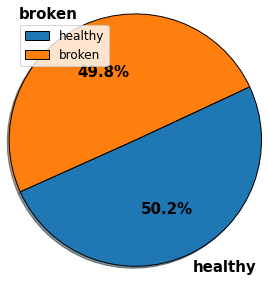

In [3]:
#Jumlah Persebaran Data
columns_failure_type = df['Fault'].unique().tolist()
plt.rcParams["figure.figsize"] = (15,8)
plt.pie(df['Fault'].value_counts(), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25, 
        radius=1.3, labels=columns_failure_type, textprops={'fontsize': 15, 'weight': 'bold'})
plt.legend(columns_failure_type, loc='upper left', fontsize=12)
plt.tight_layout()

for label, count in df['Fault'].value_counts().iteritems():
    print("Jumlah Data Kondisi", label, ":", count)

In [4]:
#Mendeteksi Nilai yang Hilang pada Setiap Kolom
df.isnull().sum()

mean_1        0
mean_2        0
mean_3        0
mean_4        0
std_1         0
std_2         0
std_3         0
std_4         0
shapef_1      0
shapef_2      0
shapef_3      0
shapef_4      0
rms_1         0
rms_2         0
rms_3         0
rms_4         0
pp_1          0
pp_2          0
pp_3          0
pp_4          0
kurtosis_1    0
kurtosis_2    0
kurtosis_3    0
kurtosis_4    0
skew_1        0
skew_2        0
skew_3        0
skew_4        0
Impulsef_1    0
Impulsef_2    0
Impulsef_3    0
Impulsef_4    0
Crestf_1      0
Crestf_2      0
Crestf_3      0
Crestf_4      0
variance_1    0
variance_2    0
variance_3    0
variance_4    0
FF_1          0
FF_2          0
FF_3          0
FF_4          0
Fault         0
dtype: int64

In [5]:
# Mengetahui Tipe Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean_1      2009 non-null   float64
 1   mean_2      2009 non-null   float64
 2   mean_3      2009 non-null   float64
 3   mean_4      2009 non-null   float64
 4   std_1       2009 non-null   float64
 5   std_2       2009 non-null   float64
 6   std_3       2009 non-null   float64
 7   std_4       2009 non-null   float64
 8   shapef_1    2009 non-null   float64
 9   shapef_2    2009 non-null   float64
 10  shapef_3    2009 non-null   float64
 11  shapef_4    2009 non-null   float64
 12  rms_1       2009 non-null   float64
 13  rms_2       2009 non-null   float64
 14  rms_3       2009 non-null   float64
 15  rms_4       2009 non-null   float64
 16  pp_1        2009 non-null   float64
 17  pp_2        2009 non-null   float64
 18  pp_3        2009 non-null   float64
 19  pp_4        2009 non-null  

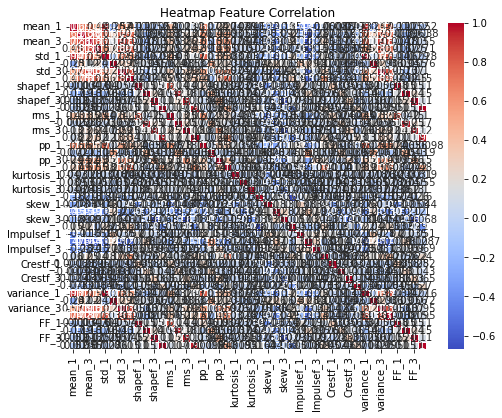

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Feature Correlation')
plt.show()

***Pre-Processing***

In [7]:
#Label Encoder untuk Mengganti Nilai Kategorik menjadi Numerik pada Variabel Target (Fault)
encoder = LabelEncoder()
df['Fault'] = encoder.fit_transform(df['Fault'])

label_enc_df = pd.DataFrame({'Kelas': encoder.classes_, 'Nilai Numerik': encoder.transform(encoder.classes_)})
label_enc_df

,Kelas,Nilai Numerik
0,broken,0
1,healthy,1


***Splitting Data***

In [8]:
#Inisialisasi Fitur (X) dan Target (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(X.shape)
print(y.shape)

(2009, 44)
(2009,)


In [9]:
#Splitting Data Training dan Data Testing
random_seed = 42
np.random.seed(random_seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=random_seed)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1607, 44) (402, 44)
(1607,) (402,)


**Decision Tree**

In [10]:
#Decision Tree without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
decision_tree = DecisionTreeClassifier(random_state=seed_value)
decision_tree.fit(X_train, y_train)

#Cross Valdiation (K-Fold)
cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_DT = cross_val_score(decision_tree, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_DT = cross_val_score(decision_tree, X, y, cv = cv).mean()
Precision_DT = cross_val_score(decision_tree, X, y, cv=cv, scoring='precision_macro').mean()
Recall_DT = cross_val_score(decision_tree, X, y, cv=cv, scoring='recall_macro').mean()
F1score_DT = cross_val_score(decision_tree, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_DecisionTree    : {Train_Accuracy_DT}")
print(f"Testing Accuracy_DecisionTree     : {Test_Accuracy_DT}")
print(f"Precision_DecisionTree            : {Precision_DT}")
print(f"Recall_DecisionTree               : {Recall_DT}")
print(f"F1-score_DecisionTree             : {F1score_DT}")

Training Accuracy_DecisionTree    : 0.9981327760685745
Testing Accuracy_DecisionTree     : 0.9970136846937383
Precision_DecisionTree            : 0.9961604515368153
Recall_DecisionTree               : 0.9975695998744053
F1-score_DecisionTree             : 0.9965167812744788


**Adaptive Boosting (AdaBoost)**

In [11]:
#AdaBoost without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)

#Define Base estimator (Decision Tree) with Default Parameter
base_estimator = DecisionTreeClassifier(ccp_alpha = 0.0,
                                        class_weight = None, 
                                        criterion = 'gini', 
                                        max_depth = None, 
                                        max_features = None, 
                                        max_leaf_nodes = None, 
                                        min_impurity_decrease = 0.0, 
                                        min_samples_leaf = 1, 
                                        min_samples_split =  2, 
                                        min_weight_fraction_leaf = 0.0, 
                                        random_state = 42, 
                                        splitter = 'best')
                                        
adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=seed_value)
adaboost.fit(X_train, y_train)

#Cross Valdiation (K-Fold)
cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_ADB = cross_val_score(adaboost, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_ADB = cross_val_score(adaboost, X, y, cv = cv).mean()
Precision_ADB  = cross_val_score(adaboost, X, y, cv=cv, scoring='precision_macro').mean()
Recall_ADB  = cross_val_score(adaboost, X, y, cv=cv, scoring='recall_macro').mean()
F1score_ADB  = cross_val_score(adaboost, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_DecisionTree    : {Train_Accuracy_ADB}")
print(f"Testing Accuracy_DecisionTree     : {Test_Accuracy_ADB}")
print(f"Precision_DecisionTree            : {Precision_ADB}")
print(f"Recall_DecisionTree               : {Recall_ADB}")
print(f"F1-score_DecisionTree             : {F1score_ADB}")

Training Accuracy_DecisionTree    : 0.9981327760685745
Testing Accuracy_DecisionTree     : 0.9965161722559273
Precision_DecisionTree            : 0.9967127061146538
Recall_DecisionTree               : 0.9970514651593794
F1-score_DecisionTree             : 0.9970142967908986


**Extreme Gradient Boosting (XGBoost)**

In [12]:
#XGBoost without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
xgboost = XGBClassifier(random_state=seed_value)
xgboost.fit(X_train, y_train)

#Cross Valdiation (K-Fold)
cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_XGB = cross_val_score(xgboost, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_XGB = cross_val_score(xgboost, X, y, cv = cv).mean()
Precision_XGB = cross_val_score(xgboost, X, y, cv=cv, scoring='precision_macro').mean()
Recall_XGB = cross_val_score(xgboost, X, y, cv=cv, scoring='recall_macro').mean()
F1score_XGB = cross_val_score(xgboost, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_XGBoost    : {Train_Accuracy_XGB}")
print(f"Testing Accuracy_XGBoost     : {Test_Accuracy_XGB}")
print(f"Precision_XGBoost            : {Precision_XGB}")
print(f"Recall_XGBoost               : {Recall_XGB}")
print(f"F1-score_XGBoost             : {F1score_XGB}")

Training Accuracy_XGBoost    : 0.9981327760685745
Testing Accuracy_XGBoost     : 0.9980099502487562
Precision_XGBoost            : 0.9986172744227926
Recall_XGBoost               : 0.9985223264872353
F1-score_XGBoost             : 0.9980094017144676


**Category Boosting (CatBoost)**

In [13]:
#CatBoost without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
catboost = CatBoostClassifier(random_state=seed_value, verbose=0)
catboost.fit(X_train, y_train)

#Cross Valdiation (K-Fold)
cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_CTB = cross_val_score(catboost, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_CTB = cross_val_score(catboost, X, y, cv = cv).mean()
Precision_CTB = cross_val_score(catboost, X, y, cv=cv, scoring='precision_macro').mean()
Recall_CTB = cross_val_score(catboost, X, y, cv=cv, scoring='recall_macro').mean()
F1score_CTB = cross_val_score(catboost, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_CatBoost    : {Train_Accuracy_CTB}")
print(f"Testing Accuracy_CatBoost     : {Test_Accuracy_CTB}")
print(f"Precision_CatBoost            : {Precision_CTB}")
print(f"Recall_CatBoost               : {Recall_CTB}")
print(f"F1-score_CatBoost             : {F1score_CTB}")

Training Accuracy_CatBoost    : 0.9981327760685745
Testing Accuracy_CatBoost     : 0.9990049751243781
Precision_CatBoost            : 0.9995412844036696
Recall_CatBoost               : 0.99902892026304
F1-score_CatBoost             : 0.9995019667358379


**Histogram Gradient Boosting**

In [14]:
#HistBoost without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
histboost = HistGradientBoostingClassifier(random_state=seed_value)
histboost.fit(X_train, y_train)

#Cross Valdiation (K-Fold)
cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_HTB = cross_val_score(histboost, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_HTB = cross_val_score(histboost, X, y, cv = cv).mean()
Precision_HTB = cross_val_score(histboost, X, y, cv=cv, scoring='precision_macro').mean()
Recall_HTB = cross_val_score(histboost, X, y, cv=cv, scoring='recall_macro').mean()
F1score_HTB = cross_val_score(histboost, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_HistBoost    : {Train_Accuracy_HTB}")
print(f"Testing Accuracy_HistBoost     : {Test_Accuracy_HTB}")
print(f"Precision_HistBoost            : {Precision_HTB}")
print(f"Recall_HistBoost               : {Recall_HTB}")
print(f"F1-score_HistBoost             : {F1score_HTB}")

Training Accuracy_HistBoost    : 0.9993769470404985
Testing Accuracy_HistBoost     : 0.9985074626865671
Precision_HistBoost            : 0.9986067049644174
Recall_HistBoost               : 0.9985223264872353
F1-score_HistBoost             : 0.9995019667358379


**Light Gradient Boosting**

In [15]:
#LightGradientBoosting without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
lgbm = lgb.LGBMClassifier(random_state=seed_value)
lgbm.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_LGB = cross_val_score(lgbm, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_LGB = cross_val_score(lgbm, X, y, cv = cv).mean()
Precision_LGB = cross_val_score(lgbm, X, y, cv=cv, scoring='precision_macro').mean()
Recall_LGB = cross_val_score(lgbm, X, y, cv=cv, scoring='recall_macro').mean()
F1score_LGB = cross_val_score(lgbm, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_LGBM     : {Train_Accuracy_LGB}")
print(f"Testing Accuracy_LGBM      : {Test_Accuracy_LGB}")
print(f"Precision_LGBM             : {Precision_LGB}")
print(f"Recall_LGBM                : {Recall_LGB}")
print(f"F1-score_LGBM              : {F1score_LGB}")


Training Accuracy_LGBM     : 0.996892474990809
Testing Accuracy_LGBM      : 0.9985062220071711
Precision_LGBM             : 0.9980202303355323
Recall_LGBM                : 0.9976068414287795
F1-score_LGBM              : 0.9970132612908416


**Gradient Boosting**

In [16]:
#LightGradientBoosting without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
GBM = GradientBoostingClassifier(random_state=seed_value)
GBM.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_GB = cross_val_score(GBM, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_GB = cross_val_score(GBM, X, y, cv = cv).mean()
Precision_GB = cross_val_score(GBM, X, y, cv=cv, scoring='precision_macro').mean()
Recall_GB = cross_val_score(GBM, X, y, cv=cv, scoring='recall_macro').mean()
F1score_GB = cross_val_score(GBM, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_GBM     : {Train_Accuracy_GB}")
print(f"Testing Accuracy_GBM      : {Test_Accuracy_GB}")
print(f"Precision_GBM             : {Precision_GB}")
print(f"Recall_GBM                : {Recall_GB}")
print(f"F1-score_GBM              : {F1score_GB}")


Training Accuracy_GBM     : 0.9981327760685745
Testing Accuracy_GBM      : 0.9960186598181163
Precision_GBM             : 0.9975992979424527
Recall_GBM                : 0.9975537978065917
F1-score_GBM              : 0.9975119046701586


**Random Forest**

In [17]:
#Random Forest without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
random_forest = RandomForestClassifier(random_state=seed_value)
random_forest.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_RF = cross_val_score(random_forest, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_RF = cross_val_score(random_forest, X, y, cv = cv).mean()
Precision_RF = cross_val_score(random_forest, X, y, cv=cv, scoring='precision_macro').mean()
Recall_RF = cross_val_score(random_forest, X, y, cv=cv, scoring='recall_macro').mean()
F1score_RF = cross_val_score(random_forest, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_Random Forest     : {Train_Accuracy_RF}")
print(f"Testing Accuracy_Random Forest      : {Test_Accuracy_RF}")
print(f"Precision_Random Forest             : {Precision_RF}")
print(f"Recall_Random Forest                : {Recall_RF}")
print(f"F1-score_Random Forest              : {F1score_RF}")


Training Accuracy_Random Forest     : 0.9987558290280761
Testing Accuracy_Random Forest      : 0.9990049751243781
Precision_Random Forest             : 0.9990718008355947
Recall_Random Forest                : 0.9990542413808523
F1-score_Random Forest              : 0.9990044265891751


**Logistic Regression**

In [18]:
#Logistic Regression without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
logistic_regression = LogisticRegression(random_state=seed_value)
logistic_regression.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_LR = cross_val_score(logistic_regression, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_LR = cross_val_score(logistic_regression, X, y, cv=cv).mean()
Precision_LR = cross_val_score(logistic_regression, X, y, cv=cv, scoring='precision_macro').mean()
Recall_LR = cross_val_score(logistic_regression, X, y, cv=cv, scoring='recall_macro').mean()
F1score_LR = cross_val_score(logistic_regression, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_Logistic Regression     : {Train_Accuracy_LR}")
print(f"Testing Accuracy_Logistic Regression      : {Test_Accuracy_LR}")
print(f"Precision_Logistic Regression             : {Precision_LR}")
print(f"Recall_Logistic Regression                : {Recall_LR}")
print(f"F1-score_Logistic Regression              : {F1score_LR}")

c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Training Accuracy_Logistic Regression     : 0.9676360751533446
Testing Accuracy_Logistic Regression      : 0.96763935931316
Precision_Logistic Regression             : 0.9707964069251821
Recall_Logistic Regression                : 0.9696553820554055
F1-score_Logistic Regression              : 0.9686020650727263


c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

**Support Vector Machines**

In [19]:
#Support Vector Machines without Parameter Tuning
seed_value = 42
np.random.seed(seed_value)
svm_classifier = SVC(random_state=seed_value)
svm_classifier.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_SVM = cross_val_score(svm_classifier, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_SVM = cross_val_score(svm_classifier, X, y, cv=cv).mean()
Precision_SVM = cross_val_score(svm_classifier, X, y, cv=cv, scoring='precision_macro').mean()
Recall_SVM = cross_val_score(svm_classifier, X, y, cv=cv, scoring='recall_macro').mean()
F1score_SVM = cross_val_score(svm_classifier, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_SVM     : {Train_Accuracy_SVM}")
print(f"Testing Accuracy_SVM      : {Test_Accuracy_SVM}")
print(f"Precision_SVM             : {Precision_SVM}")
print(f"Recall_SVM                : {Recall_SVM}")
print(f"F1-score_SVM              : {F1score_SVM}")

Training Accuracy_SVM     : 0.9278187341576208
Testing Accuracy_SVM      : 0.9337936253892632
Precision_SVM             : 0.936121186321927
Recall_SVM                : 0.9290739860246111
F1-score_SVM              : 0.9312439173598982


**k-Nearest Neighbors**

In [20]:
# Set the random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_KNN = cross_val_score(knn_classifier, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_KNN = cross_val_score(knn_classifier, X, y, cv=cv).mean()
Precision_KNN = cross_val_score(knn_classifier, X, y, cv=cv, scoring='precision_macro').mean()
Recall_KNN = cross_val_score(knn_classifier, X, y, cv=cv, scoring='recall_macro').mean()
F1score_KNN = cross_val_score(knn_classifier, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_KNN     : {Train_Accuracy_KNN}")
print(f"Testing Accuracy_KNN      : {Test_Accuracy_KNN}")
print(f"Precision_KNN             : {Precision_KNN}")
print(f"Recall_KNN                : {Recall_KNN}")
print(f"F1-score_KNN              : {F1score_KNN}")

Training Accuracy_KNN     : 0.6627155047309456
Testing Accuracy_KNN      : 0.6799444175630575
Precision_KNN             : 0.6812200870698872
Recall_KNN                : 0.6716299923123473
F1-score_KNN              : 0.6782883178885066


**Naive Bayes**

In [21]:
# Set the random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True)
Train_Accuracy_NB = cross_val_score(naive_bayes, X_train, y_train, scoring='accuracy', cv=cv).mean()
Test_Accuracy_NB = cross_val_score(naive_bayes, X, y, cv=cv).mean()
Precision_NB = cross_val_score(naive_bayes, X, y, cv=cv, scoring='precision_macro').mean()
Recall_NB = cross_val_score(naive_bayes, X, y, cv=cv, scoring='recall_macro').mean()
F1score_NB = cross_val_score(naive_bayes, X, y, cv=cv, scoring='f1_macro').mean()
print(f"Training Accuracy_NB     : {Train_Accuracy_NB}")
print(f"Testing Accuracy_NB      : {Test_Accuracy_NB}")
print(f"Precision_NB             : {Precision_NB}")
print(f"Recall_NB                : {Recall_NB}")
print(f"F1-score_NB              : {F1score_NB}")

Training Accuracy_NB     : 0.9620382732532266
Testing Accuracy_NB      : 0.9571928387985261
Precision_NB             : 0.9597119595411561
Recall_NB                : 0.9572660811917102
F1-score_NB              : 0.9571173852727647


In [22]:
feature_names = df.columns[:-1]
feature_names

Index(['mean_1', 'mean_2', 'mean_3', 'mean_4', 'std_1', 'std_2', 'std_3',
       'std_4', 'shapef_1', 'shapef_2', 'shapef_3', 'shapef_4', 'rms_1',
       'rms_2', 'rms_3', 'rms_4', 'pp_1', 'pp_2', 'pp_3', 'pp_4', 'kurtosis_1',
       'kurtosis_2', 'kurtosis_3', 'kurtosis_4', 'skew_1', 'skew_2', 'skew_3',
       'skew_4', 'Impulsef_1', 'Impulsef_2', 'Impulsef_3', 'Impulsef_4',
       'Crestf_1', 'Crestf_2', 'Crestf_3', 'Crestf_4', 'variance_1',
       'variance_2', 'variance_3', 'variance_4', 'FF_1', 'FF_2', 'FF_3',
       'FF_4'],
      dtype='object')

Feature 1: 0.3139
Feature 37: 0.1706
Feature 5: 0.1505
Feature 29: 0.0493
Feature 40: 0.0421
Feature 17: 0.0352
Feature 2: 0.0335
Feature 3: 0.0301
Feature 38: 0.0210
Feature 6: 0.0196
Feature 8: 0.0177
Feature 26: 0.0163
Feature 39: 0.0115
Feature 20: 0.0097
Feature 7: 0.0096
Feature 25: 0.0087
Feature 4: 0.0077
Feature 31: 0.0070
Feature 41: 0.0061
Feature 13: 0.0053
Feature 9: 0.0041
Feature 19: 0.0035
Feature 30: 0.0033
Feature 32: 0.0033
Feature 27: 0.0020
Feature 21: 0.0015
Feature 18: 0.0015
Feature 10: 0.0015
Feature 16: 0.0014
Feature 24: 0.0014
Feature 28: 0.0012
Feature 42: 0.0011
Feature 23: 0.0010
Feature 15: 0.0010
Feature 44: 0.0009
Feature 22: 0.0008
Feature 33: 0.0008
Feature 36: 0.0007
Feature 43: 0.0007
Feature 35: 0.0007
Feature 34: 0.0006
Feature 11: 0.0006
Feature 12: 0.0005
Feature 14: 0.0004


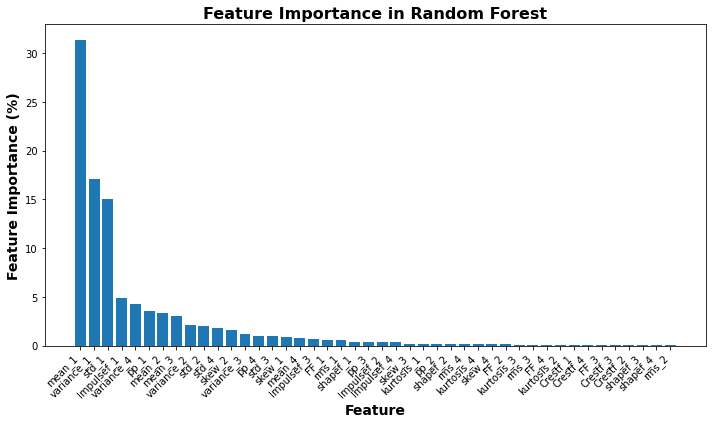

In [23]:
feature_importance = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
for i, index in enumerate(sorted_indices):
    print(f"Feature {index + 1}: {feature_importance[index]:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices] * 100)
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices], rotation=45, ha='right')
plt.xlabel("Feature", fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel("Feature Importance (%)", fontdict={'size': 14, 'weight': 'bold'})
plt.title("Feature Importance in Random Forest", fontdict={'size': 16, 'weight': 'bold'})
plt.tight_layout()
plt.show()

In [24]:
#Tree Based Algorithm
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'Histogram Boosting', 'Light Gradient Boosting', 'Random Forest'],
    'Testing Accuracy' : [Test_Accuracy_DT, Test_Accuracy_ADB, Test_Accuracy_GB, Test_Accuracy_XGB, Test_Accuracy_CTB, Test_Accuracy_HTB, Test_Accuracy_LGB, Test_Accuracy_RF],
    'Training Accuracy' : [Train_Accuracy_DT, Train_Accuracy_ADB, Train_Accuracy_GB, Train_Accuracy_XGB, Train_Accuracy_CTB, Train_Accuracy_HTB, Train_Accuracy_LGB, Train_Accuracy_RF],
    'Precision' : [Precision_DT, Precision_ADB, Precision_GB, Precision_XGB, Precision_CTB, Precision_HTB, Precision_LGB, Precision_RF],
    'Recall' : [Recall_DT, Recall_ADB, Recall_GB, Recall_XGB, Recall_CTB, Recall_HTB, Recall_LGB, Recall_RF],
    'F1-Score' : [F1score_DT, F1score_ADB, F1score_GB, F1score_XGB, F1score_CTB, F1score_HTB, F1score_LGB, F1score_RF]
})
models.iloc[:, 1:] = models.iloc[:, 1:].mul(100)
models.sort_values(by = ['Testing Accuracy', 'Training Accuracy', 'Precision', 'Recall', 'F1-Score'])

,Model,Testing Accuracy,Training Accuracy,Precision,Recall,F1-Score
2,Gradient Boosting,99.601866,99.813278,99.759930,99.755380,99.751190
1,AdaBoost,99.651617,99.813278,99.671271,99.705147,99.701430
0,Decision Tree,99.701368,99.813278,99.616045,99.756960,99.651678
3,XGBoost,99.800995,99.813278,99.861727,99.852233,99.800940
6,Light Gradient Boosting,99.850622,99.689247,99.802023,99.760684,99.701326
5,Histogram Boosting,99.850746,99.937695,99.860670,99.852233,99.950197
4,CatBoost,99.900498,99.813278,99.954128,99.902892,99.950197
7,Random Forest,99.900498,99.875583,99.907180,99.905424,99.900443


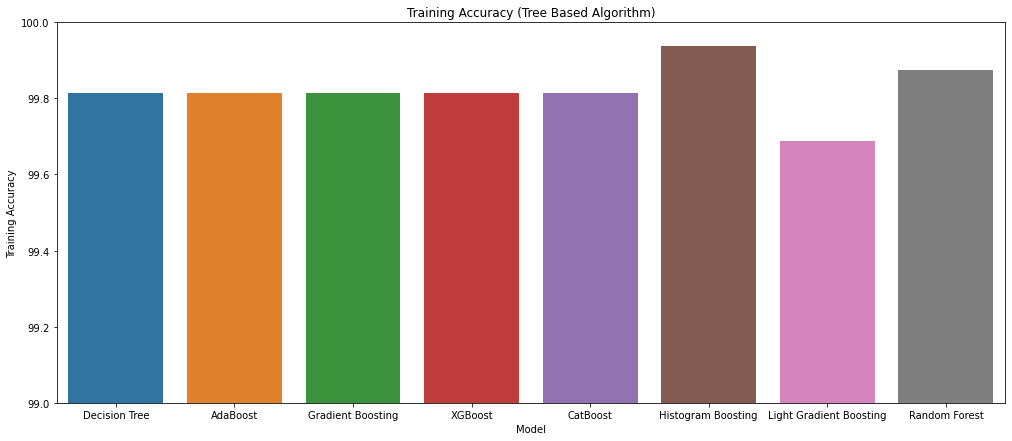

In [25]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Training Accuracy', data=models)
plt.title("Training Accuracy (Tree Based Algorithm)")
plt.ylim(99,100)
plt.show()

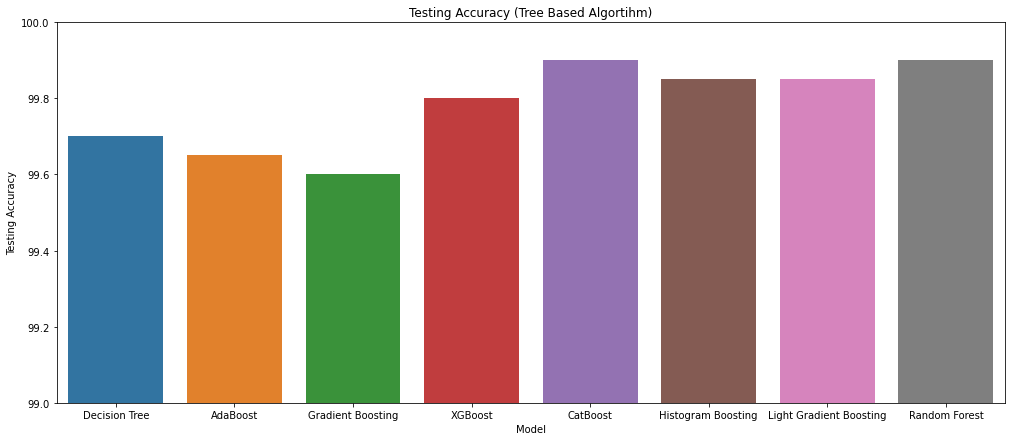

In [26]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Testing Accuracy', data=models)
plt.title("Testing Accuracy (Tree Based Algortihm)")
plt.ylim(99,100)
plt.show()

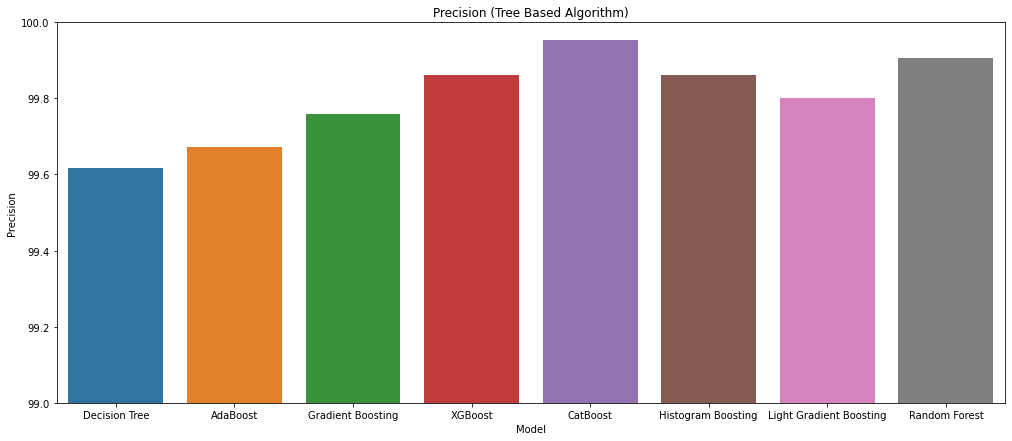

In [27]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Precision', data=models)
plt.title("Precision (Tree Based Algorithm)")
plt.ylim(99,100)
plt.show()

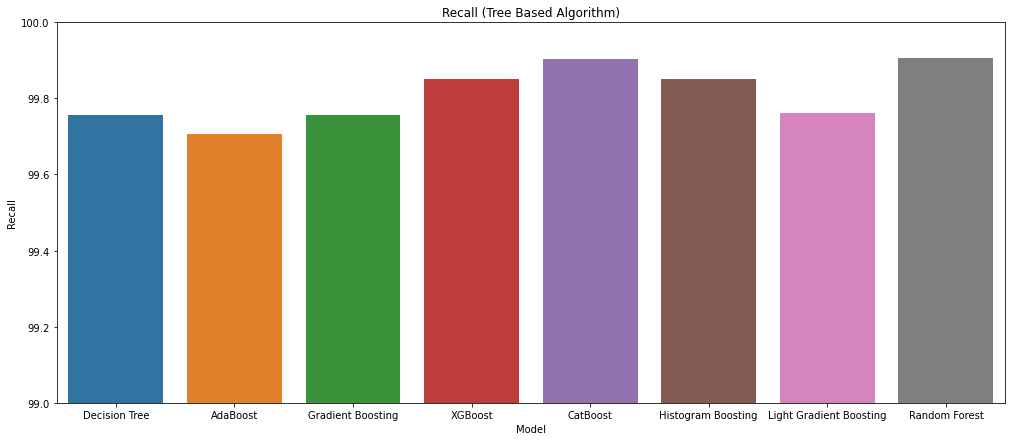

In [28]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Recall', data=models)
plt.title("Recall (Tree Based Algorithm)")
plt.ylim(99,100)
plt.show()

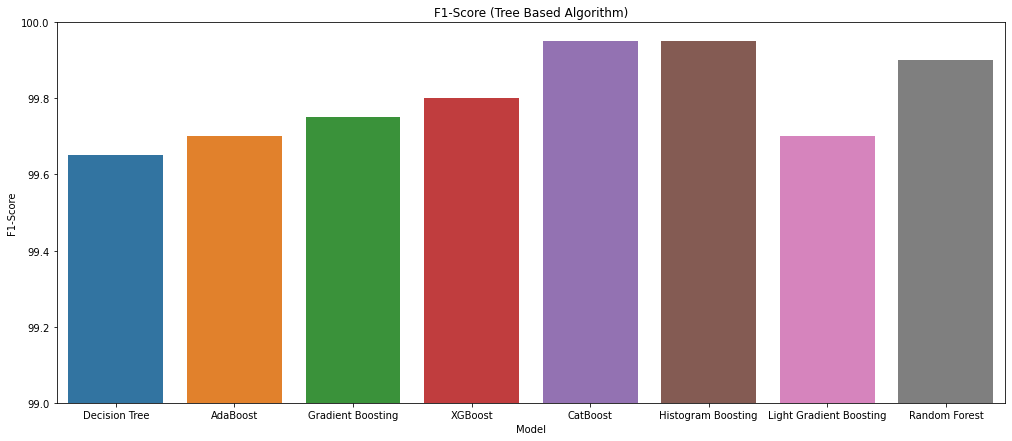

In [29]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='F1-Score', data=models)
plt.title("F1-Score (Tree Based Algorithm)")
plt.ylim(99,100)
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_11908\1499037752.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.1f}".format(y) for y in ax.get_yticks()], fontsize=14)


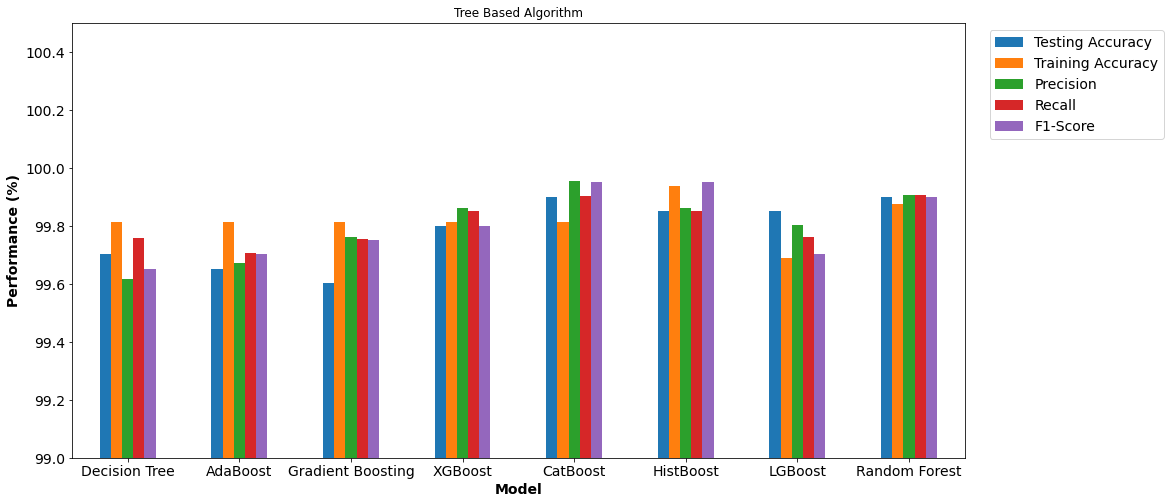

In [30]:
new_labels = ['Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'HistBoost', 'LGBoost', 'Random Forest']
models.plot(kind="bar", figsize=(16, 8), legend=True)
plt.xlabel("Model", fontdict={'size': 14, 'weight': 'bold'})
plt.xticks(range(len(models)), new_labels, rotation=0, fontsize=14)
plt.ylim(99,100.5)
plt.ylabel("Performance (%)",fontdict={'size': 14, 'weight': 'bold'})
plt.legend(fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')
ax = plt.gca()
ax.set_yticklabels(["{:.1f}".format(y) for y in ax.get_yticks()], fontsize=14) 
plt.title("Tree Based Algorithm")
plt.show()

In [33]:
#Non Tree Based Algorithm
modelsnon = pd.DataFrame({
    'Model' : ['SVM', 'Naive Bayes', 'Logistic Regression', 'KNN'],
    'Testing Accuracy' : [Test_Accuracy_SVM, Test_Accuracy_NB, Test_Accuracy_LR, Test_Accuracy_KNN],
    'Training Accuracy' : [Train_Accuracy_SVM, Train_Accuracy_NB, Train_Accuracy_LR, Train_Accuracy_KNN],
    'Precision' : [Precision_SVM, Precision_NB, Precision_LR, Precision_KNN],
    'Recall' : [Recall_SVM, Recall_NB, Recall_LR, Recall_KNN],
    'F1-Score' : [F1score_SVM, F1score_NB, F1score_LR, F1score_KNN]
})
modelsnon.iloc[:, 1:] = modelsnon.iloc[:, 1:].mul(100)
modelsnon.sort_values(by = ['Testing Accuracy', 'Training Accuracy', 'Precision', 'Recall', 'F1-Score'])

,Model,Testing Accuracy,Training Accuracy,Precision,Recall,F1-Score
3,KNN,67.994442,66.271550,68.122009,67.162999,67.828832
0,SVM,93.379363,92.781873,93.612119,92.907399,93.124392
1,Naive Bayes,95.719284,96.203827,95.971196,95.726608,95.711739
2,Logistic Regression,96.763936,96.763608,97.079641,96.965538,96.860207


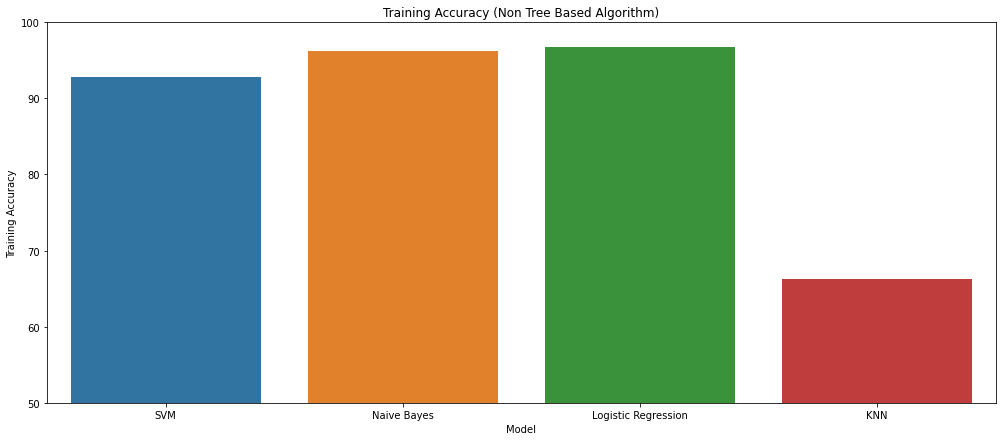

In [36]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Training Accuracy', data=modelsnon)
plt.title("Training Accuracy (Non Tree Based Algorithm)")
plt.ylim(50,100)
plt.show()

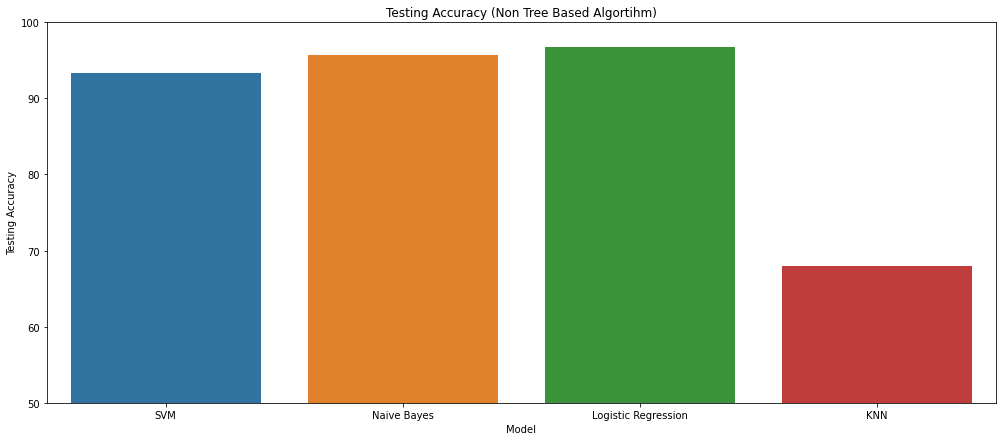

In [37]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Testing Accuracy', data=modelsnon)
plt.title("Testing Accuracy (Non Tree Based Algortihm)")
plt.ylim(50,100)
plt.show()

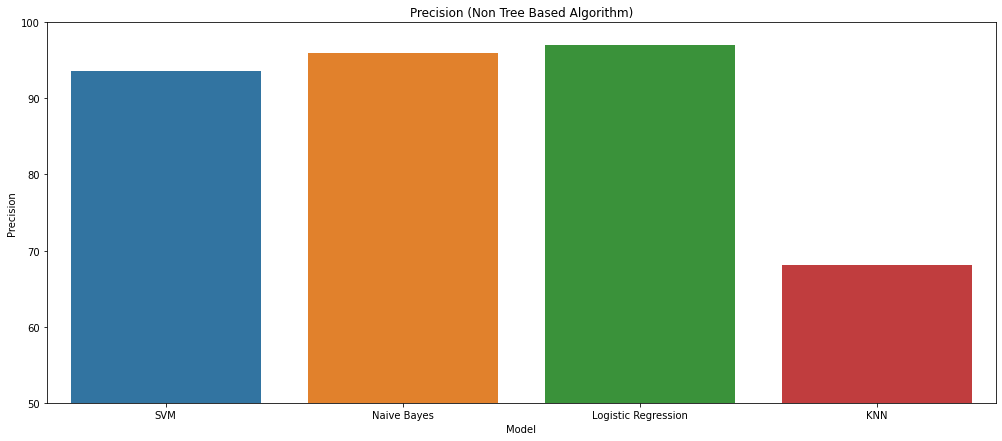

In [38]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Precision', data=modelsnon)
plt.title("Precision (Non Tree Based Algorithm)")
plt.ylim(50,100)
plt.show()

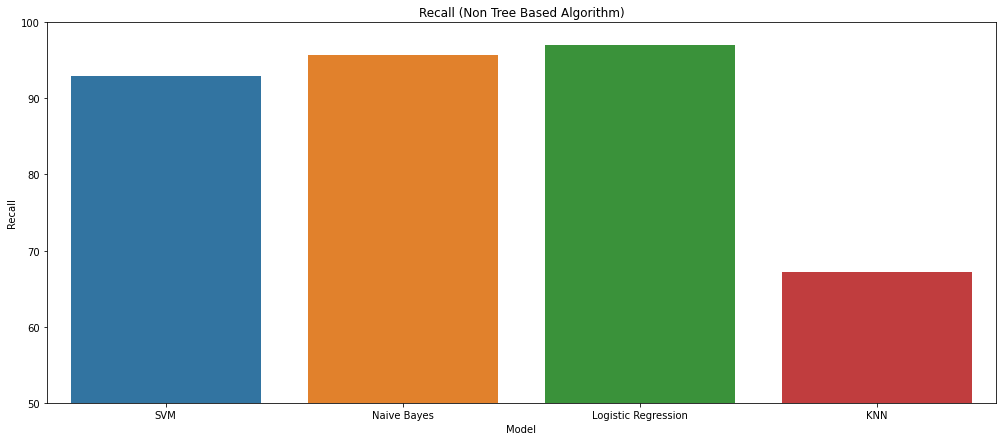

In [39]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='Recall', data=modelsnon)
plt.title("Recall (Non Tree Based Algorithm)")
plt.ylim(50,100)
plt.show()

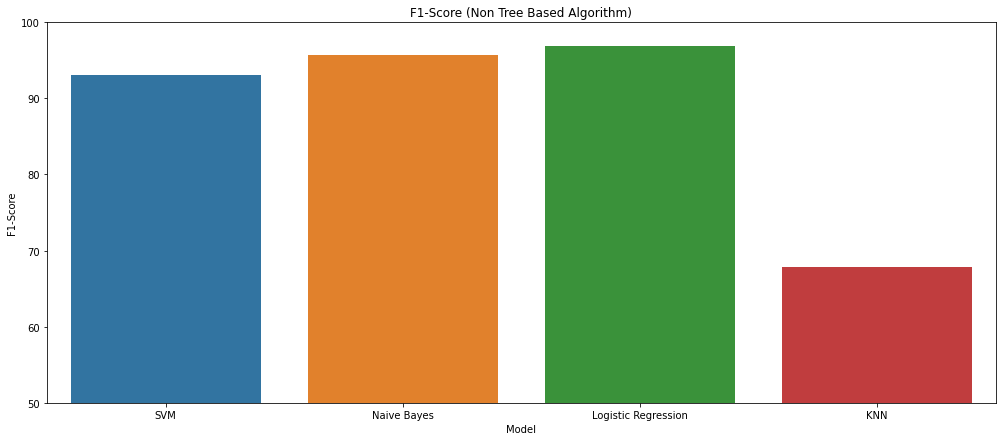

In [40]:
plt.figure(figsize=(17,7))
sns.barplot(x='Model', y='F1-Score', data=modelsnon)
plt.title("F1-Score (Non Tree Based Algorithm)")
plt.ylim(50,100)
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_11908\3540461908.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.1f}".format(y) for y in ax.get_yticks()], fontsize=14)


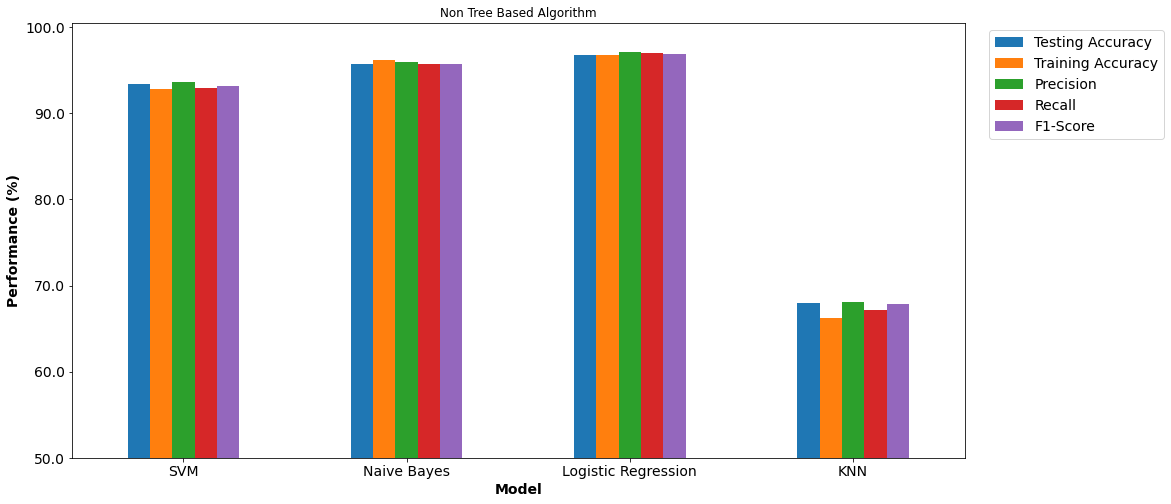

In [43]:
new_labels = ['SVM', 'Naive Bayes', 'Logistic Regression', 'KNN']
modelsnon.plot(kind="bar", figsize=(16, 8), legend=True)
plt.xlabel("Model", fontdict={'size': 14, 'weight': 'bold'})
plt.xticks(range(len(modelsnon)), new_labels, rotation=0, fontsize=14)
plt.ylim(50,100.5)
plt.ylabel("Performance (%)",fontdict={'size': 14, 'weight': 'bold'})
plt.legend(fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')
ax = plt.gca()
ax.set_yticklabels(["{:.1f}".format(y) for y in ax.get_yticks()], fontsize=14) 
plt.title("Non Tree Based Algorithm")
plt.show()

***Save Model***

In [44]:
import pickle
pickle.dump(decision_tree, open(r'D:\python\code\Gear\STFT\Model\decision_tree.sav', 'wb'))
pickle.dump(adaboost, open(r'D:\python\code\Gear\STFT\Model\AdaBoost.sav', 'wb'))
pickle.dump(xgboost, open(r'D:\python\code\Gear\STFT\Model\XGBoost.sav', 'wb'))
pickle.dump(catboost, open(r'D:\python\code\Gear\STFT\Model\CatBoost.sav', 'wb'))
pickle.dump(histboost, open(r'D:\python\code\Gear\STFT\Model\HistBoost.sav', 'wb'))
pickle.dump(lgbm, open(r'D:\python\code\Gear\STFT\Model\LGBM.sav', 'wb'))
pickle.dump(GBM, open(r'D:\python\code\Gear\STFT\Model\GBM.sav', 'wb'))
pickle.dump(random_forest, open(r'D:\python\code\Gear\STFT\Model\random_forest.sav', 'wb'))
pickle.dump(logistic_regression, open(r'D:\python\code\Gear\STFT\Model\logistic_regression.sav', 'wb'))
pickle.dump(svm_classifier, open(r'D:\python\code\Gear\STFT\Model\SVM.sav', 'wb'))
pickle.dump(knn_classifier, open(r'D:\python\code\Gear\STFT\Model\KNN.sav', 'wb'))
pickle.dump(naive_bayes, open(r'D:\python\code\Gear\STFT\Model\naive_bayes.sav', 'wb'))